In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from keras import metrics

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, Dropout, MaxPooling2D

loc = '/Users/divyamkumar/Desktop/OCT-8/model.keras'
PATH = '/Users/divyamkumar/Desktop/OCT-8/forgit'
PATHog = '/Users/divyamkumar/Desktop/OCT-8/data'
IMG_HEIGHT = 400
IMG_WIDTH = 400

In [6]:
model = tf.keras.models.load_model(loc, compile=False)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [14]:
test_image_generator = ImageDataGenerator(rescale=1./255)
test_data_gen = test_image_generator.flow_from_directory(
                    PATHog,
                    color_mode = "grayscale",
                    target_size=(IMG_HEIGHT, IMG_WIDTH),
                    batch_size=20,
                    classes=['test'],
                    shuffle=False)
probabilities = model.predict(test_data_gen).flatten()

Found 200 images belonging to 1 classes.
10/10 [==============================] - 3s 310ms/step


In [15]:
def check(probabilities):
  answers =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
              1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
              1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
              1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
              1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
              1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
              1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
              1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
              1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
              1, 1, 1, 1, 1, 1
              ]

  correct = 0

  for probability, answer in zip(probabilities, answers):
    if round(probability) == answer:
      correct +=1

  percentage_identified = (correct / len(answers)) * 100


  print(f"Your model correctly identified {round(percentage_identified, 3)}% of the images of CNV and NORMAL OCTs.")
check(probabilities)
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% Normal")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% CNV")
    plt.show()

Your model correctly identified 94.898% of the images of CNV and NORMAL OCTs.


Found 8 images belonging to 1 classes.
2/2 [==============================] - 0s 42ms/step


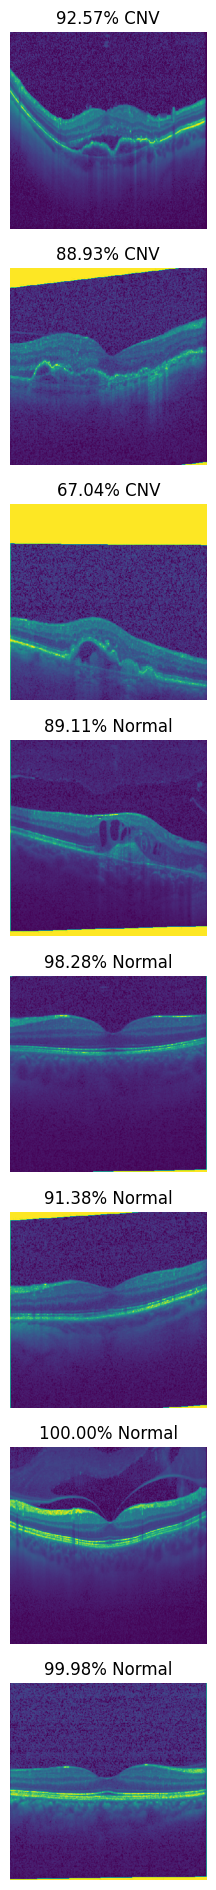

In [81]:
demo_image_generator = ImageDataGenerator(rescale=1./255)
demo_data_gen = demo_image_generator.flow_from_directory(
                    PATH,
                    color_mode = "grayscale",
                    target_size=(IMG_HEIGHT, IMG_WIDTH),
                    batch_size=4,
                    classes=['explainingdata'],
                    shuffle=False)

im_arr = [demo_data_gen[0][0][i] for i in range(4)] + [demo_data_gen[1][0][i] for i in range(4)]

probs = model.predict(demo_data_gen).flatten()

plotImages(demo_images, probs)

In [8]:
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear

replace2linear = ReplaceToLinear()

In [99]:
from tf_keras_vis.utils.scores import BinaryScore
score = BinaryScore(1) # or BinaryScore(True) 

from matplotlib import cm  #color map
from tf_keras_vis.gradcam import Gradcam #Gradcam

In [100]:
gradcam = Gradcam(model,
                  model_modifier=replace2linear,
                  clone=True)

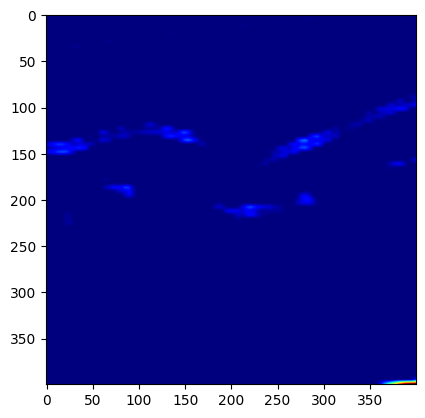

In [101]:
def create_heat(score, im_arr):
       cam = [gradcam(score, im_arr[0], penultimate_layer=-1), gradcam(score, im_arr[1], penultimate_layer=-1), 
              gradcam(score, im_arr[2], penultimate_layer=-1), gradcam(score, im_arr[3], penultimate_layer=-1),
              gradcam(score, im_arr[4], penultimate_layer=-1), gradcam(score, im_arr[5], penultimate_layer=-1),
              gradcam(score, im_arr[6], penultimate_layer=-1), gradcam(score, im_arr[7], penultimate_layer=-1)] 
       return cam
#creates gradcam heatmap using specified layer
cam = create_heat(score, demo_images)
plt.imshow(np.uint8(cm.jet(cam[1][0])[..., :3] * 255))
#Causes Kernel Crashes

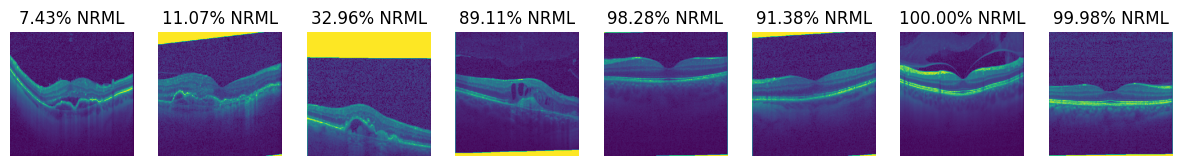

In [104]:
fig, axes = plt.subplots(1, 8, figsize=(15, 15))

for img, probability, ax in zip(demo_images, probs, axes):
        ax.imshow(img)
        ax.axis('off')
        ax.set_title("%.2f" % ((probability)*100) + "% NRML")
plt.show()

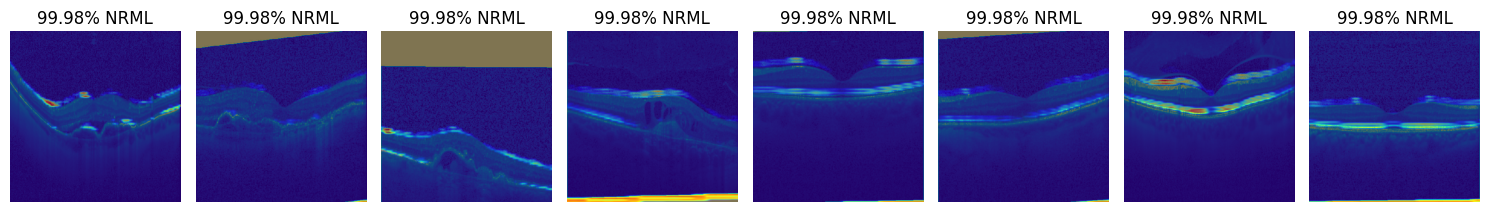

In [107]:
fig, axes = plt.subplots(1, 8, figsize=(15, 15))
count = 0
for img, ax in zip(demo_images, axes):
    heatmap = np.uint8(cm.jet(cam[count][0])[..., :3] * 255)
    ax.imshow(img)
    ax.imshow(heatmap, cmap='jet', alpha=0.5)
    ax.set_title("%.2f" % ((probability)*100) + "% NRML")
    ax.axis('off')
    count+=1
plt.tight_layout()
plt.show()

In [92]:
#Still working on this LIME Part

In [14]:
import lime
from lime import lime_image

In [16]:
explainer = lime_image.LimeImageExplainer()

In [22]:
%%time
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(demo_images, model.predict(demo_data_gen), top_labels=2, hide_color=0, num_samples=8)

2/2 [==============================] - 0s 41ms/step


AttributeError: 'list' object has no attribute 'shape'